## Model Training

### 1.1 Import libraries

In [31]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

## 1.2 Import the data

In [32]:
df = pd.read_csv("data/stud.csv")

## 1.3 Show the top 5 records

In [33]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 1.4 Prepare the X and Y variables

In [34]:
X = df.drop(columns = ['math_score'], axis = 1)
y = df["math_score"]

In [35]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [36]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [37]:
## Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include = "object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
one_hot_transformer = OneHotEncoder(handle_unknown = "ignore")
preprocessor = ColumnTransformer(
    transformers = [
        ("OneHotEncoder", one_hot_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


In [38]:
X = preprocessor.fit_transform(X)

In [39]:
X.shape

(1000, 19)

In [40]:
## separate the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)

(800, 19) (200, 19)


## 1.5 Create an evaluation function

In [41]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [46]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "CatBoost": CatBoostRegressor(verbose = 0),
    "XGBoost": XGBRegressor(eval_metric = 'rmse'),
    "SVR": SVR()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the train and test set data
    mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
    mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    ## Outputs
    print("Model performance on training set:")
    print("Root Mean Squared Error: {:.4f}".format(rmse_train))
    print("Mean Squared Error: {:.4f}".format(mse_train))
    print("Mean Absolute Error: {:.4f}".format(mae_train))
    print("R2 Score: {:.4f}".format(r2_train))

    print("----------------------------------------------------------")

    print("Model performance on training set:")
    print("Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("Mean Squared Error: {:.4f}".format(mse_test))
    print("Mean Absolute Error: {:.4f}".format(mae_test))
    print("R2 Score: {:.4f}".format(r2_test))
   
    r2_list.append(r2_test)
    print('='*35)
    print('\n')

Linear Regression
Model performance on training set:
Root Mean Squared Error: 5.3231
Mean Squared Error: 28.3349
Mean Absolute Error: 4.2667
R2 Score: 0.8743
----------------------------------------------------------
Model performance on training set:
Root Mean Squared Error: 5.3940
Mean Squared Error: 29.0952
Mean Absolute Error: 4.2148
R2 Score: 0.8804


Ridge Regression
Model performance on training set:
Root Mean Squared Error: 5.3233
Mean Squared Error: 28.3378
Mean Absolute Error: 4.2650
R2 Score: 0.8743
----------------------------------------------------------
Model performance on training set:
Root Mean Squared Error: 5.3904
Mean Squared Error: 29.0563
Mean Absolute Error: 4.2111
R2 Score: 0.8806


Lasso Regression
Model performance on training set:
Root Mean Squared Error: 6.5938
Mean Squared Error: 43.4784
Mean Absolute Error: 5.2063
R2 Score: 0.8071
----------------------------------------------------------
Model performance on training set:
Root Mean Squared Error: 6.5197


## 1.6 Results

In [47]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model", "R2_Score"]).sort_values(by = "R2_Score", ascending = False)

,Model,R2_Score
1,Ridge Regression,0.880593
0,Linear Regression,0.880433
7,CatBoost,0.851632
5,Random Forest,0.851112
6,AdaBoost,0.846496
8,XGBoost,0.827797
2,Lasso Regression,0.825320
3,KNN,0.783681
9,SVR,0.728600
4,Decision Tree,0.728177


## Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
score = r2_score(y_test, y_test_pred)*100
print("R2 Score: ", score)

R2 Score:  88.04332983749565


## 1.7 Plot y_pred vs y_test

Text(0.5, 1.0, 'Actual vs Predicted Values')

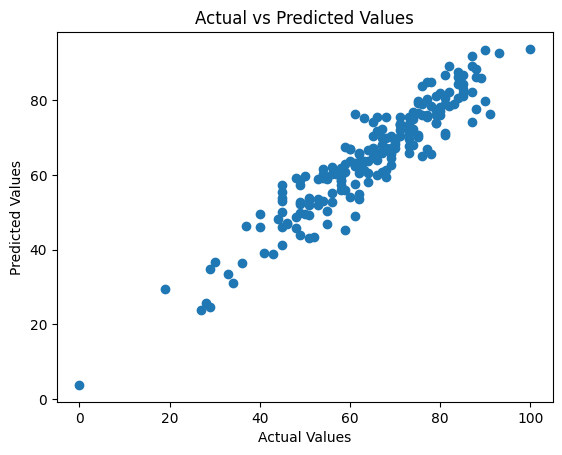

In [51]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

<Axes: xlabel='math_score'>

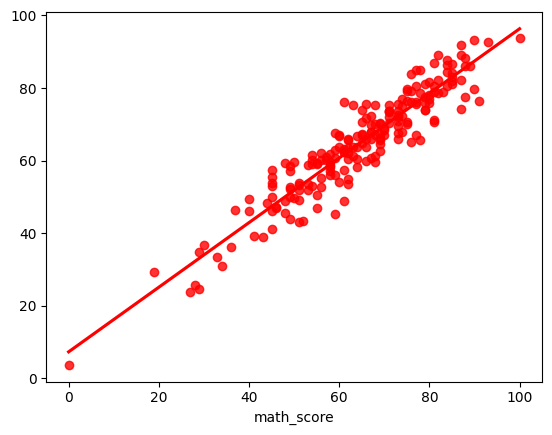

In [52]:
sns.regplot(x = y_test, y = y_test_pred, ci = None, color = "red")

## 1.8 Difference between actual and predicted values

In [53]:
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": y_test_pred, "Difference": y_test - y_test_pred})
pred_df

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
